In [1]:
import pandas
import seaborn
import sqlite3 as sql

conexao_bd = sql.connect('censo_universitario.db')

def salva_arquivos_csv(anos, colunas):
    for ano in anos:
        dados = pandas.read_csv(
            f'dados/{ano}/DM_ALUNO.CSV',
            delimiter='|',
            encoding='iso-8859-1',
            usecols=colunas,
        ).rename(
            columns={
                colunas[0]: 'cor',
                colunas[1]: 'categoria_universidade',
                colunas[2]: 'idade',
                colunas[3]: 'reserva_etnica',
                colunas[4]: 'reserva_renda_familiar',
            }
        )
        dados['ano'] = ano
        dados.to_sql('censo_universitario', conexao_bd, if_exists='append')

In [2]:
salva_arquivos_csv(
    anos=['2019', '2018', '2017'],
    colunas=['TP_COR_RACA', 'TP_CATEGORIA_ADMINISTRATIVA', 'NU_IDADE',
             'IN_RESERVA_ETNICO', 'IN_RESERVA_RENDA_FAMILIAR']
)

In [3]:
salva_arquivos_csv(
    anos=['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009'],
    colunas=['CO_COR_RACA_ALUNO', 'CO_CATEGORIA_ADMINISTRATIVA', 'NU_IDADE_ALUNO',
             'IN_RESERVA_ETNICO', 'IN_RESERVA_RENDA_FAMILIAR']
)

In [4]:
dataframe = pandas.read_sql('SELECT * FROM censo_universitario LIMIT 10', conexao_bd)

In [5]:
dataframe.head()

,index,categoria_universidade,cor,idade,reserva_etnica,reserva_renda_familiar,ano
0,0,1,2,27,NaN,NaN,2019
1,1,1,3,32,1.0,0.0,2019
2,2,1,3,31,0.0,0.0,2019
3,3,1,2,31,1.0,0.0,2019
4,4,1,3,42,1.0,0.0,2019


In [6]:
"""
    Relação numérica de cor/raça
    1. Branca
    2. Preta
    3. Parda
    4. Amarela
    5. Indígena
    6. Não dispõe da informação
    0. Não declarado
"""

dataframe = pandas.read_sql(
    'SELECT cor, COUNT(*) as total FROM censo_universitario WHERE cor IN (1, 2, 3) GROUP BY cor',
    conexao_bd
)

dataframe

,cor,total
0,1,90476334
1,2,13030178
2,3,52628555


<AxesSubplot:ylabel='total'>

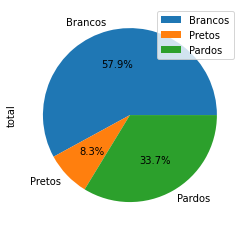

In [7]:
# Quantidade de alunos por cor na universidade considerando todos os anos

dataframe = dataframe.rename(index={0: 'Brancos', 1: 'Pretos', 2: 'Pardos'})
dataframe.plot(kind='pie', y='total', autopct='%1.1f%%')

In [8]:
"""
    Relação númerica categoria universidade
    1. Pública Federal
    2. Pública Estadual
    3. Pública Municipal
    4. Privada com fins lucrativos
    5. Privada sem fins lucrativos
"""

dataframe = pandas.read_sql(
    'SELECT cor, COUNT(*) as total FROM censo_universitario WHERE cor IN (1, 2, 3) '
    'AND categoria_universidade IN (1, 2, 3) GROUP BY cor',
    conexao_bd
)

dataframe

,cor,total
0,1,20305619
1,2,4158862
2,3,13805782


<AxesSubplot:ylabel='total'>

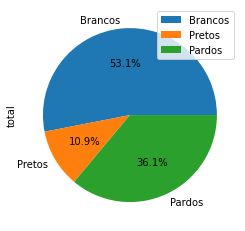

In [9]:
# Quantidade de alunos por cor na universidade pública considerando todos os anos

dataframe = dataframe.rename(index={0: 'Brancos', 1: 'Pretos', 2: 'Pardos'})
dataframe.plot(kind='pie', y='total', autopct='%1.1f%%')

In [10]:
dataframe = pandas.read_sql(
    'SELECT ano, COUNT(*) as total FROM censo_universitario WHERE cor = 2 GROUP BY ano',
    conexao_bd
)

dataframe

,ano,total
0,2009,383808
1,2010,537738
2,2011,598785
3,2012,726738
4,2013,847686
5,2014,1300557
6,2015,1741266
7,2016,2023086
8,2017,1469320
9,2018,1655728


Text(0.5, 1.0, 'Quantidade de alunos negros na universidade por ano')

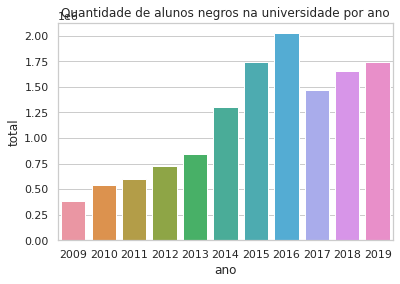

In [11]:
# Quantidade de alunos negros na universidade por ano

seaborn.set_theme(style="whitegrid")
seaborn.barplot(
    x='ano', y='total', data=dataframe
).set_title('Quantidade de alunos negros na universidade por ano')

In [12]:
dataframe = pandas.read_sql(
    'SELECT reserva_etnica, COUNT(*) as total FROM censo_universitario WHERE cor = 2 GROUP BY reserva_etnica',
    conexao_bd
).dropna().replace({0: 'Não', 1: 'Sim'})

dataframe

,reserva_etnica,total
1,Não,639586
2,Sim,1180793


Text(0.5, 1.0, 'Quantidade de alunos negros que entraram por reserva de vaga')

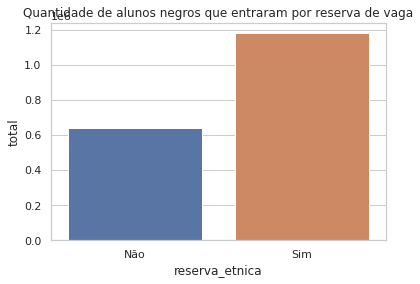

In [13]:
# Quantidade de alunos negros que entraram por reserva de vaga étnica na universidade

seaborn.barplot(
    x='reserva_etnica', y='total', data=dataframe
).set_title('Quantidade de alunos negros que entraram por reserva de vaga')

In [14]:
dataframe = pandas.read_sql(
    'SELECT cor, COUNT(*) as total FROM censo_universitario WHERE cor IN (1, 2, 3) AND '
    'reserva_renda_familiar = 1 GROUP BY cor',
    conexao_bd
).replace({1: 'Brancos', 2: 'Pretos', 3: 'Pardos'})

dataframe

,cor,total
0,Brancos,676243
1,Pretos,372541
2,Pardos,1160197


Text(0.5, 1.0, 'Quantidade de alunos por cor que entraram por reserva de vaga de renda familiar')

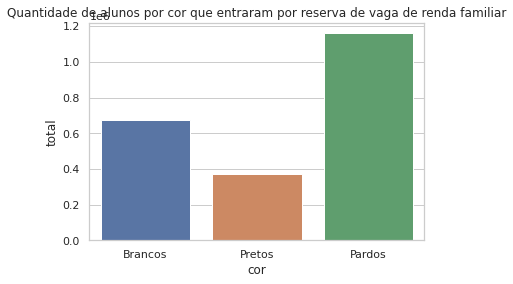

In [15]:
seaborn.barplot(
    x='cor', y='total', data=dataframe
).set_title('Quantidade de alunos por cor que entraram por reserva de vaga de renda familiar')

In [18]:
dataframe = pandas.read_sql(
    'SELECT cor, AVG(idade) as media FROM censo_universitario WHERE cor IN (1, 2, 3) GROUP BY cor',
    conexao_bd
).replace({1: 'Brancos', 2: 'Pretos', 3: 'Pardos'})

dataframe

,cor,media
0,Brancos,26.703011
1,Pretos,27.602599
2,Pardos,27.325879
